In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data import data_loader

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [2]:
train_generator, val_generator, test_generator = data_loader.load_data()

Found 70499 images belonging to 29 classes.
Found 7830 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    input_shape = data_batch.shape[1:]
    num_classes = labels_batch.shape[1]
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64, 29)


In [4]:
input_shape

(150, 150, 3)

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs=10
)

Epoch 1/10


2022-12-13 17:31:43.078740: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 17:31:43.476408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - ETA: 0s - loss: 0.9688 - accuracy: 0.7067

2022-12-13 17:33:14.157541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1102/1102 [==============================] - 98s 87ms/step - loss: 0.9688 - accuracy: 0.7067 - val_loss: 0.7634 - val_accuracy: 0.7309
Epoch 2/10
1102/1102 [==============================] - 94s 85ms/step - loss: 0.1232 - accuracy: 0.9594 - val_loss: 0.7041 - val_accuracy: 0.7696
Epoch 3/10
1102/1102 [==============================] - 94s 85ms/step - loss: 0.0719 - accuracy: 0.9768 - val_loss: 0.7860 - val_accuracy: 0.7581
Epoch 4/10
1102/1102 [==============================] - 93s 84ms/step - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.6737 - val_accuracy: 0.7986
Epoch 5/10
1102/1102 [==============================] - 92s 84ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.6111 - val_accuracy: 0.8050
Epoch 6/10
1102/1102 [==============================] - 93s 84ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.6721 - val_accuracy: 0.8083
Epoch 7/10
1102/1102 [==============================] - 93s 85ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.5823 - val_accura

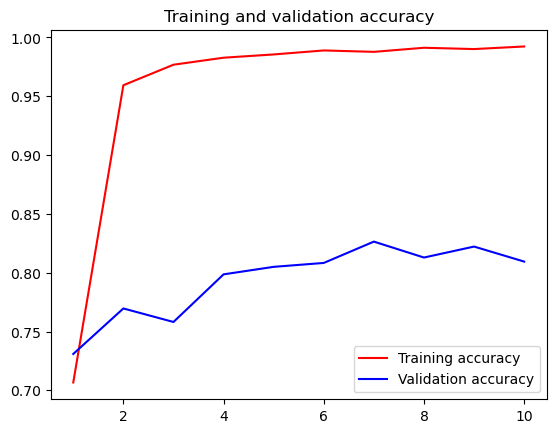

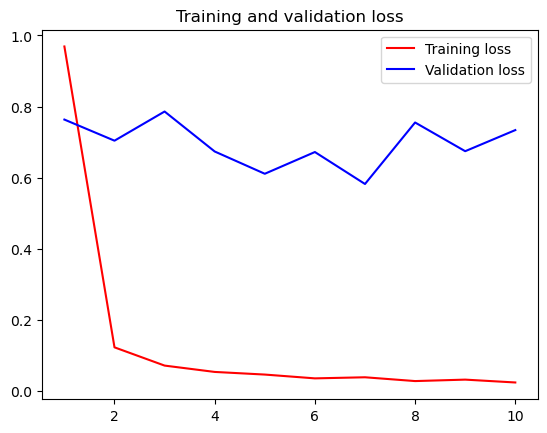

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
scores = model.evaluate(test_generator)

print(f'Test {model.metrics_names[1]} is {100 * scores[1]}')
print(f'Test {model.metrics_names[0]} is {scores[0]}')

136/136 [==============================] - 8s 55ms/step - loss: 0.0924 - accuracy: 0.9785
Test accuracy is 97.85057306289673
Test loss is 0.09235654771327972


In [15]:
from sklearn.metrics import classification_report
 
test_labels=test_generator.classes 

predictions=model.predict(test_generator, verbose=1)

y_pred = np.argmax(predictions, axis=-1)

print(classification_report(test_labels, y_pred))

  3/136 [..............................] - ETA: 5s 

2022-12-13 17:47:43.340960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


136/136 [==============================] - 8s 55ms/step
              precision    recall  f1-score   support

           0       0.05      0.05      0.05       300
           1       0.02      0.02      0.02       300
           2       0.02      0.02      0.02       300
           3       0.02      0.02      0.02       300
           4       0.03      0.03      0.03       300
           5       0.03      0.03      0.03       300
           6       0.03      0.03      0.03       300
           7       0.03      0.03      0.03       300
           8       0.04      0.04      0.04       300
           9       0.05      0.05      0.05       300
          10       0.02      0.02      0.02       300
          11       0.03      0.03      0.03       300
          12       0.03      0.03      0.03       300
          13       0.03      0.03      0.03       300
          14       0.03      0.03      0.03       300
          15       0.03      0.03      0.03       300
          16       0.03  

In [16]:
model.layers

In [19]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:9]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [20]:
img_path = 'data/live_capture/image_1670198213.580283.jpg'

from keras.preprocessing import image                             
import numpy as np

img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.                                                
print(img_tensor.shape)

(1, 150, 150, 3)


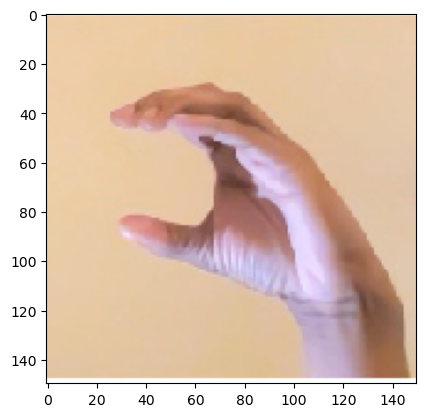

In [21]:
plt.imshow(img_tensor[0])
plt.show()

In [22]:
activations = activation_model.predict(img_tensor) 

1/1 [==============================] - 0s 166ms/step


2022-12-13 17:48:09.015824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


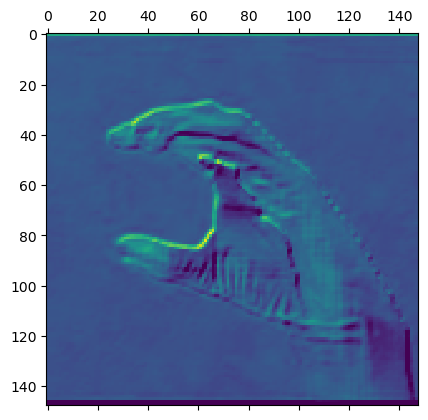

In [24]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

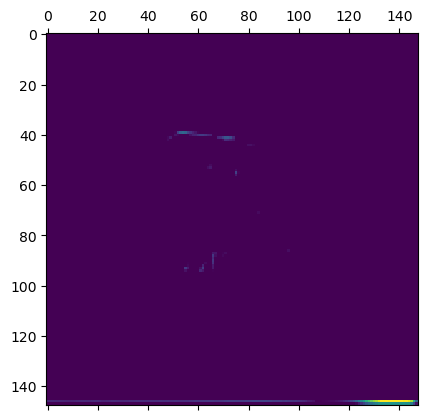

In [25]:
plt.matshow(first_layer_activation[0, :, :, 13], cmap='viridis')

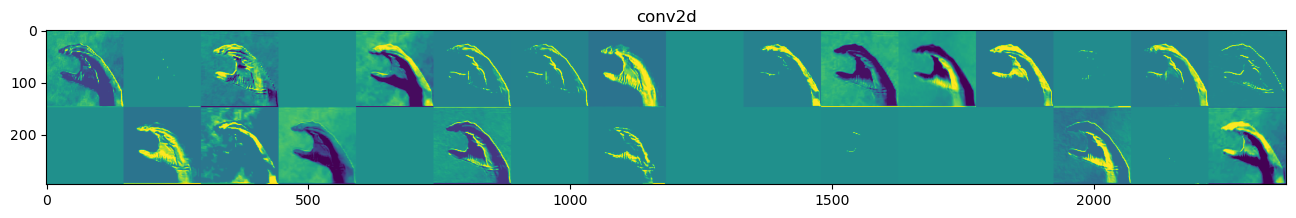

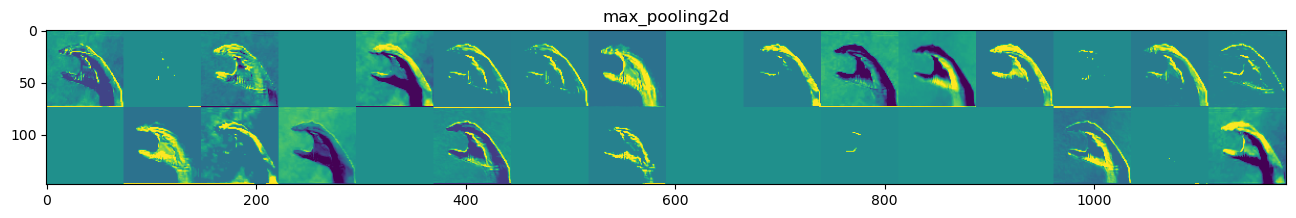

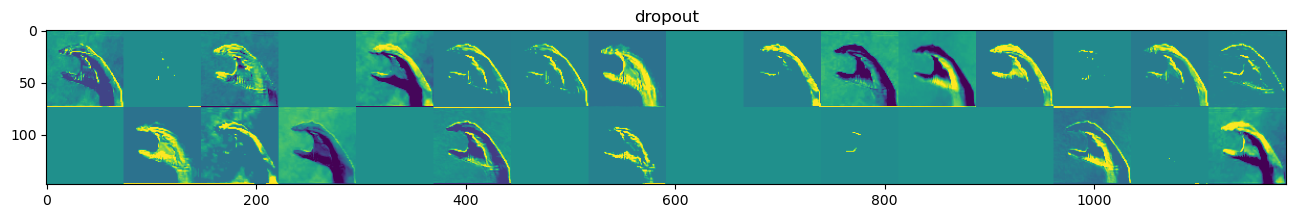

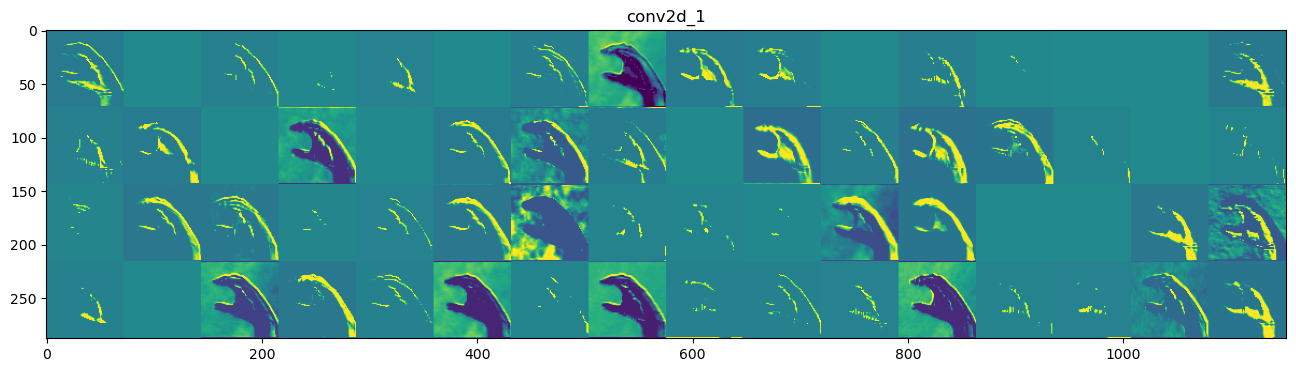

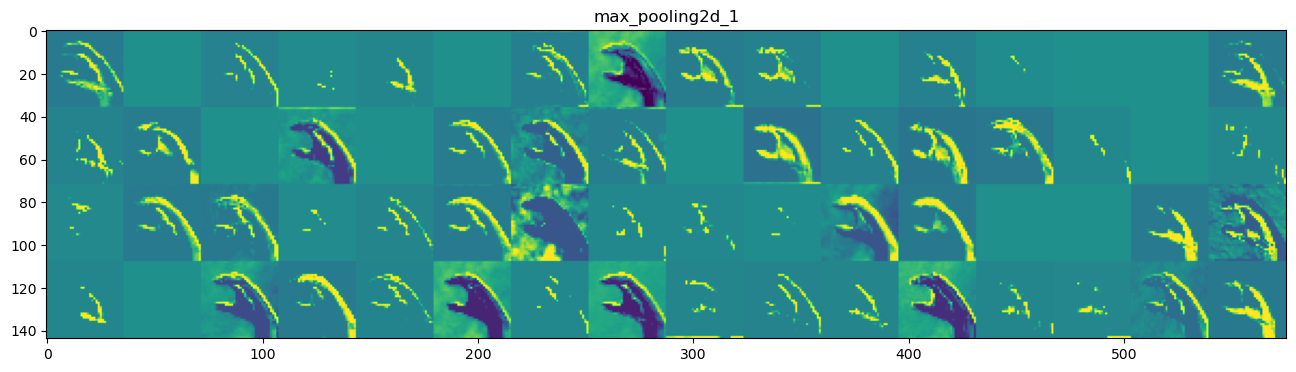

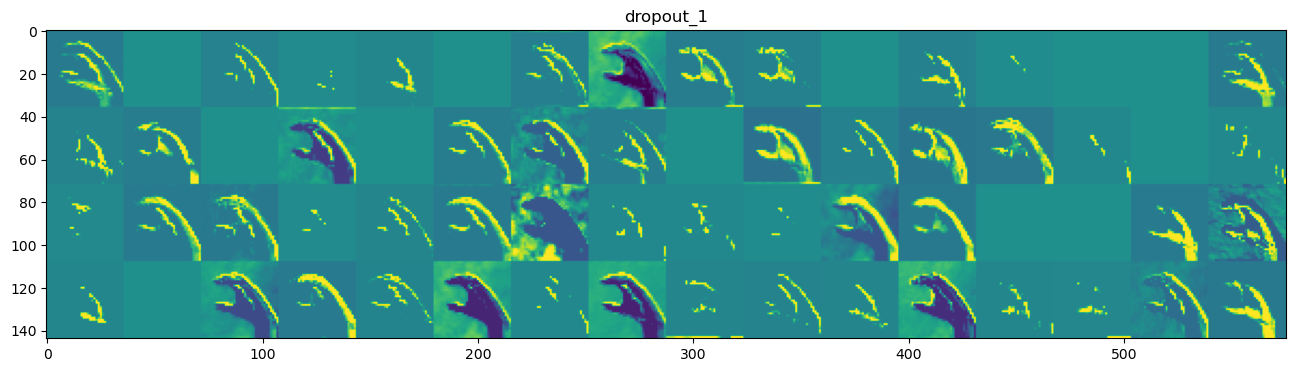

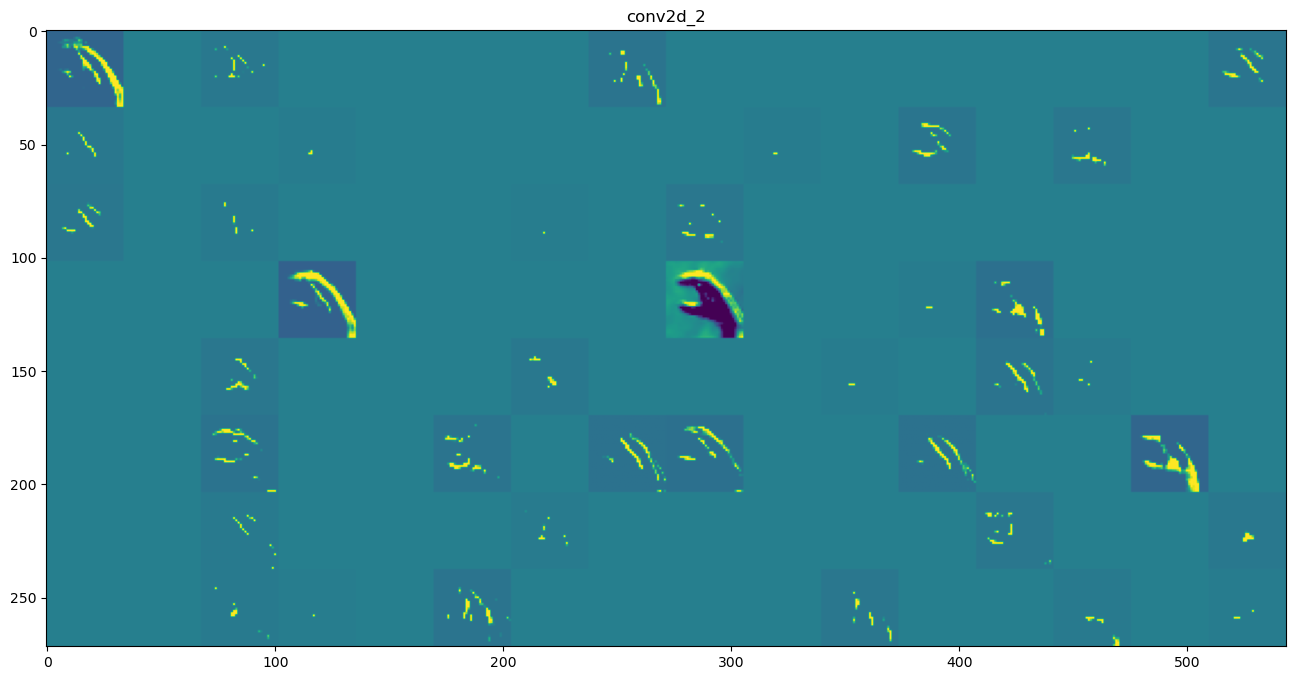

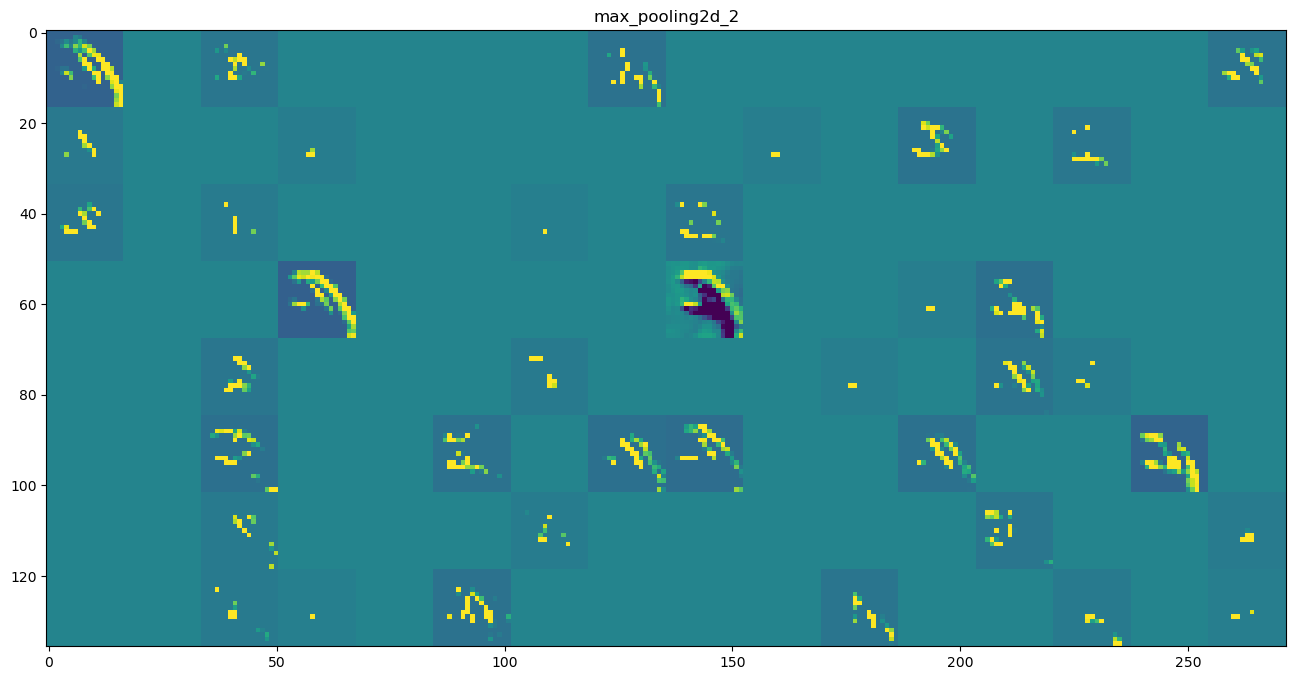

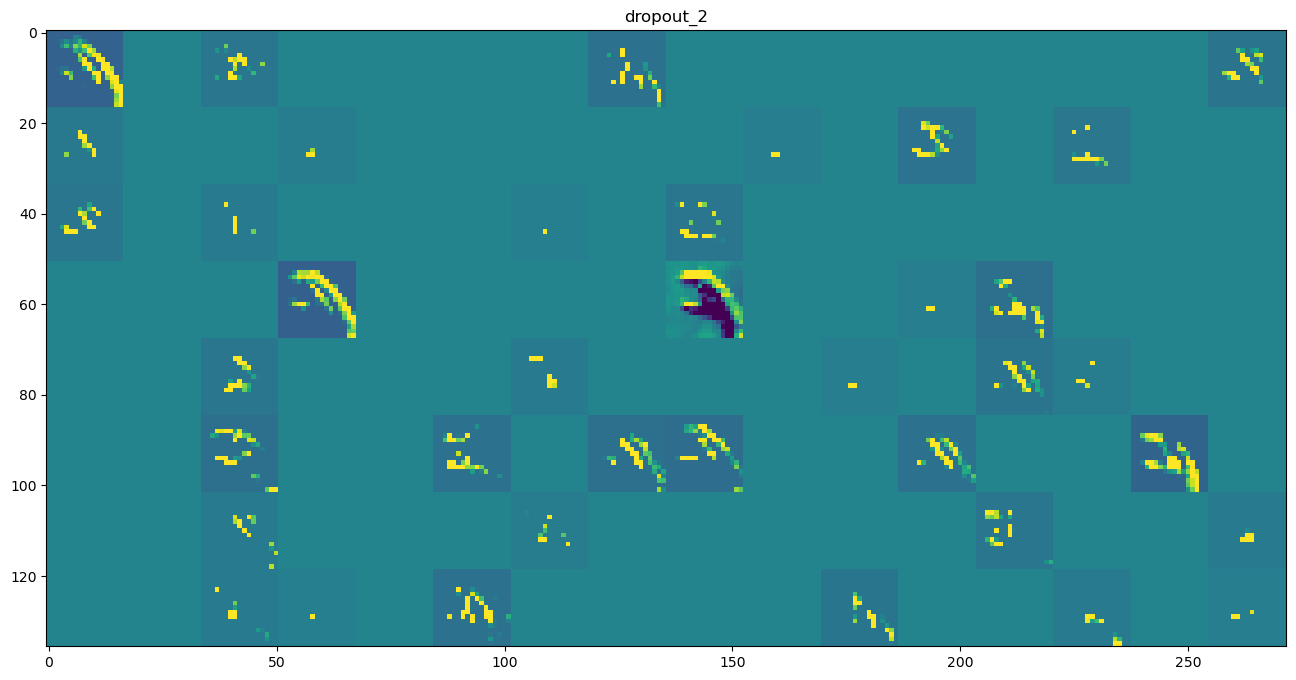

In [27]:
layer_names = []                                                          
for layer in model.layers[:9]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            if channel_image.std():
                channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
model.save('model/model_4')

In [8]:
from tensorflow.keras import backend
backend.clear_session()